










# MIE1624 assignment 2
Jiekai Yin


1004706794

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns


## Read in Data

In [2]:
df = pd.read_csv('clean_kaggle_data_2022 2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head(5)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Q29_Encoded,Q29_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN,NaN
1,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
3,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,10.0,"100,000-124,999"
4,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,13.0,"200,000-299,999"


## Data cleaning

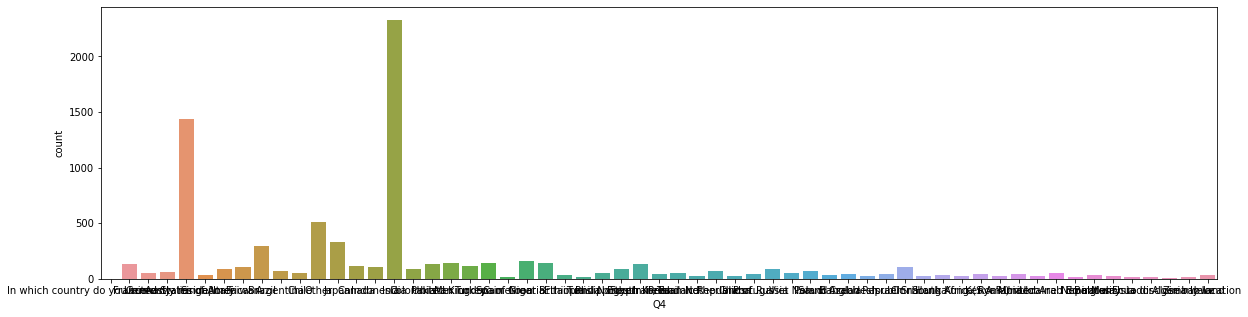

In [ ]:
# Show the distribution of Q3
Q4_cates = [v for v in df['Q4'].unique() if type(v) == str]
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x='Q4', data=df, ax=ax, order=Q4_cates)

In [ ]:
print ("Countries currently reside:")
df['Q4'].value_counts().head(10)

Countries currently reside:


India                                                   2328
United States of America                                1434
Other                                                    511
Japan                                                    333
Brazil                                                   292
Nigeria                                                  159
Spain                                                    140
Mexico                                                   139
United Kingdom of Great Britain and Northern Ireland     139
France                                                   137
Name: Q4, dtype: int64

Since there is a large number of countries that has too few people, we merge the category into "India", "United States of America", "Brazil", "Japan" and "Russia", which are the 6 countries with the largest number of people. The other people are merged to the category "other".

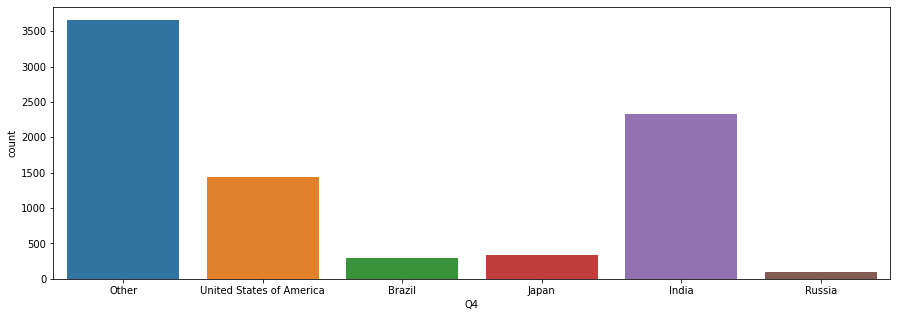

In [3]:
# Change the rest of the countries as Other
countries_selected = ["India", "United States of America", "Brazil", "Japan", "Russia"]
df["Q4"]=df["Q4"].apply(lambda x: x if x in countries_selected else "Other")
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Q4', ax=ax, data=df)

## Convert Categorical Variables



In [4]:
# remove the description row
df1 = df.iloc[1:]

In [5]:
# since we use encoded Q29 as output, we drop Q29_buckets.
df1.drop(["Q29_buckets"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We convert all the categorical features into dummies.

In [6]:
# Find the categorical variables
for col in df1.columns:
  if "_" in col and col != "Q29_Encoded":
    # Create dummy features for each categorical feature
    # Drop the first dummy variables because its value is implied
    # by the other dummy variable columns
    dummies = pd.get_dummies(df1[col], prefix=col)
   
    # Add the new features to the dataframe via concating
    df1 = pd.concat([df1, dummies], axis=1)

    # Drop the original categorical feature columns
    df1.drop(col, axis=1, inplace=True)

In [7]:
# convert Q3, Q4, Q23, Q24 into categorical variables
cate_cols = ['Q3', 'Q4', 'Q23', 'Q24']
for col in cate_cols:
    # Create dummy features for each categorical feature
    # Drop the first dummy variables because its value is implied
    # by the other dummy variable columns
    dummies1 = pd.get_dummies(df1[col], prefix=col)

    # Add the new features to the dataframe via concating
    df1 = pd.concat([df1, dummies1], axis=1)

    # Drop the original categorical feature columns
    df1.drop(col, axis=1, inplace=True)

## Handle NA values

In [ ]:
# Find the columns with NaN

for col in df1.columns:
    if "_" not in col or col == 'Q29_Encoded':
      print(col, df1[df1[col].isnull()].shape[0]/df1.shape[0])

Duration (in seconds) 0.0
Q2 0.0
Q5 0.0
Q8 0.0
Q9 0.3614798426745329
Q11 0.0
Q16 0.084070796460177
Q22 0.801622418879056
Q25 0.0
Q26 0.0
Q27 0.0
Q29 0.0
Q30 0.006145526057030482
Q32 0.7712635201573255
Q43 0.4575958702064897
Q29_Encoded 0.0


We drop the variable Q22 and Q32 since they have huge proportations of missing values.
We keep Duration (in seconds) now since the longer time people answer the question.

In [8]:
df1.drop(["Q22", "Q32", "Q9","Q43"], axis=1, inplace=True)

We drop the rows that Q16 or Q30 have na.

In [9]:
df1 = df1.dropna(subset=['Q16', 'Q30'])
df1.shape

(7409, 329)

## Convert Integer Variables


We select the features that need to be converted into integer variables.

In [ ]:
int_cols = []                            
for col in df1.columns:
    us = list(df1[col].unique())
    if us != [0,1] and us != [1,0] and col != "Q29_Encoded":
        int_cols.append(col)
        print(col, df1[col].unique())    #Q2 8 11 16 25 26 27 30

Duration (in seconds) ['851' '501' '787' ... 8570 38795 1651]
Q2 ['55-59' '30-34' '70+' '40-44' '50-54' '25-29' '60-69' '35-39' '22-24'
 '45-49' '18-21']
Q5 ['No']
Q8 ['Some college/university study without earning a bachelor’s degree'
 'Bachelor’s degree' 'Doctoral degree' 'Master’s degree'
 'I prefer not to answer' 'No formal education past high school'
 'Professional doctorate']
Q11 ['10-20 years' '20+ years' '5-10 years' '3-5 years' '< 1 years'
 '1-3 years']
Q16 ['1-2 years' '4-5 years' '5-10 years' '2-3 years' 'Under 1 year'
 '3-4 years' '10-20 years' 'I do not use machine learning methods']
Q25 ['0-49 employees' '250-999 employees' '1000-9,999 employees'
 '50-249 employees' '10,000 or more employees']
Q26 ['1-2' '20+' '3-4' '5-9' '0' '10-14' '15-19']
Q27 ['We recently started using ML methods (i.e., models in production for less than 2 years)'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'We are exploring ML methods (and may one day p

In [10]:
# drop Q5 since there is only 1 answer
df1.drop(["Q5"], axis=1, inplace=True)

In [11]:
# Q2
Q2_dt = {'18-21':0, '22-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, 
         '60-69':9, '70+':10}
df1['Q2'] = df1['Q2'].map(Q2_dt)
print("Q2: ", df1['Q2'].unique())

Q2:  [ 8  3 10  5  7  2  9  4  1  6  0]


In [12]:
df2 = df1.copy() 

In [13]:
# Q8
Q8_dt = {'I prefer not to answer':0, 'No formal education past high school':1, 
         'Some college/university study without earning a bachelor’s degree':2,
         'Bachelor’s degree':3, 'Master’s degree':4, 'Professional doctorate':5,
         'Doctoral degree':5}
df2['Q8'] = df2['Q8'].map(Q8_dt)
print("Q8: ", df2['Q8'].unique())



Q8:  [2 3 5 4 0 1]


In [14]:
# Q25
Q25_dt = {'0-49 employees':1, '50-249 employees':5, '250-999 employees':25, 
         '1000-9,999 employees':250, '10,000 or more employees':500}
df2['Q25'] = df2['Q25'].map(Q25_dt)
print("Q25: ", df2['Q25'].unique())


Q25:  [  1  25 250   5 500]


In [15]:
#Q26
Q26_dt = {'0':0, '1-2':1, '3-4':2, '5-9':3, '10-14':4, '15-19':5, '20+':6}
df2['Q26'] = df2['Q26'].map(Q26_dt)
print("Q26: ", df2['Q26'].unique())

Q26:  [1 6 2 3 0 4 5]


In [16]:
# Q27
Q27_dt = {'I do not know':0,
         'No (we do not use ML methods)': 1,
         'We use ML methods for generating insights (but do not put working models into production)':3,
         'We are exploring ML methods (and may one day put a model into production)':2,
         'We recently started using ML methods (i.e., models in production for less than 2 years)':4,
         'We have well established ML methods (i.e., models in production for more than 2 years)':5}
df2['Q27'] = df2['Q27'].map(Q27_dt)
print("Q27: ", df2['Q27'].unique())

Q27:  [4 5 2 0 3 1]


In [17]:
# Q16
Q16_dt = {'Under 1 year':1, '1-2 years':2, '2-3 years':3, '3-4 years':4, '4-5 years':5, '5-10 years':6, 
          '10-20 years':7, 'I do not use machine learning methods':0}
df2['Q16'] = df2['Q16'].map(Q16_dt)
print("Q16: ", df2["Q16"].unique())

Q16:  [2 5 6 3 1 4 7 0]


In [18]:
# Q11
Q11_dt = {'< 1 years':0, '1-3 years':1, '3-5 years':2,
          '5-10 years':4, '10-20 years':8,'20+ years':16}

df2['Q11'] = df2['Q11'].map(Q11_dt)
print("Q11: ", df2["Q11"].unique())

Q11:  [ 8 16  4  2  0  1]


In [19]:
# Q30
Q30_dt = {'$0 ($USD)':0, '$1-$99':1, '$100-$999':10, '$1000-$9,999':100, '$10,000-$99,999':1000, 
          '$100,000 or more ($USD)':1000}
df2['Q30'] = df2['Q30'].map(Q30_dt)
print("Q30: ", df2['Q30'].unique())

Q30:  [ 100    0   10 1000    1]


In [20]:
# drop Q29
df2.drop(["Q29"], axis=1, inplace=True)

In [25]:
len(list(df2.columns))

327

After performing data cleaning and convert categorical data into numerical data, we have 326 features for predicting the Q29, which is the current yearly compensation of the participants.

### 3.1 Exploratory data analysis

We are going to visualize the order of feature importance and pick the variables that are most related to Q29_encoded from over 300 features for fitting logistic regression model.

In [ ]:
# show the top 10 features that have the highest correlation
corr = df2.corr()
corr_Q29 = corr['Q29_Encoded']
print(corr_Q29.nlargest(11))

Q29_Encoded                                                                 1.000000
Q4_United States of America                                                 0.593737
Q11                                                                         0.379169
Q16                                                                         0.375654
Q2                                                                          0.316067
Q27                                                                         0.302316
Q30                                                                         0.298588
Q28_3_Build prototypes to explore applying machine learning to new areas    0.262150
Q26                                                                         0.256761
Q34_3_ Amazon Simple Storage Service (S3)                                   0.247301
Q31_1_ Amazon Web Services (AWS)                                            0.228119
Name: Q29_Encoded, dtype: float64


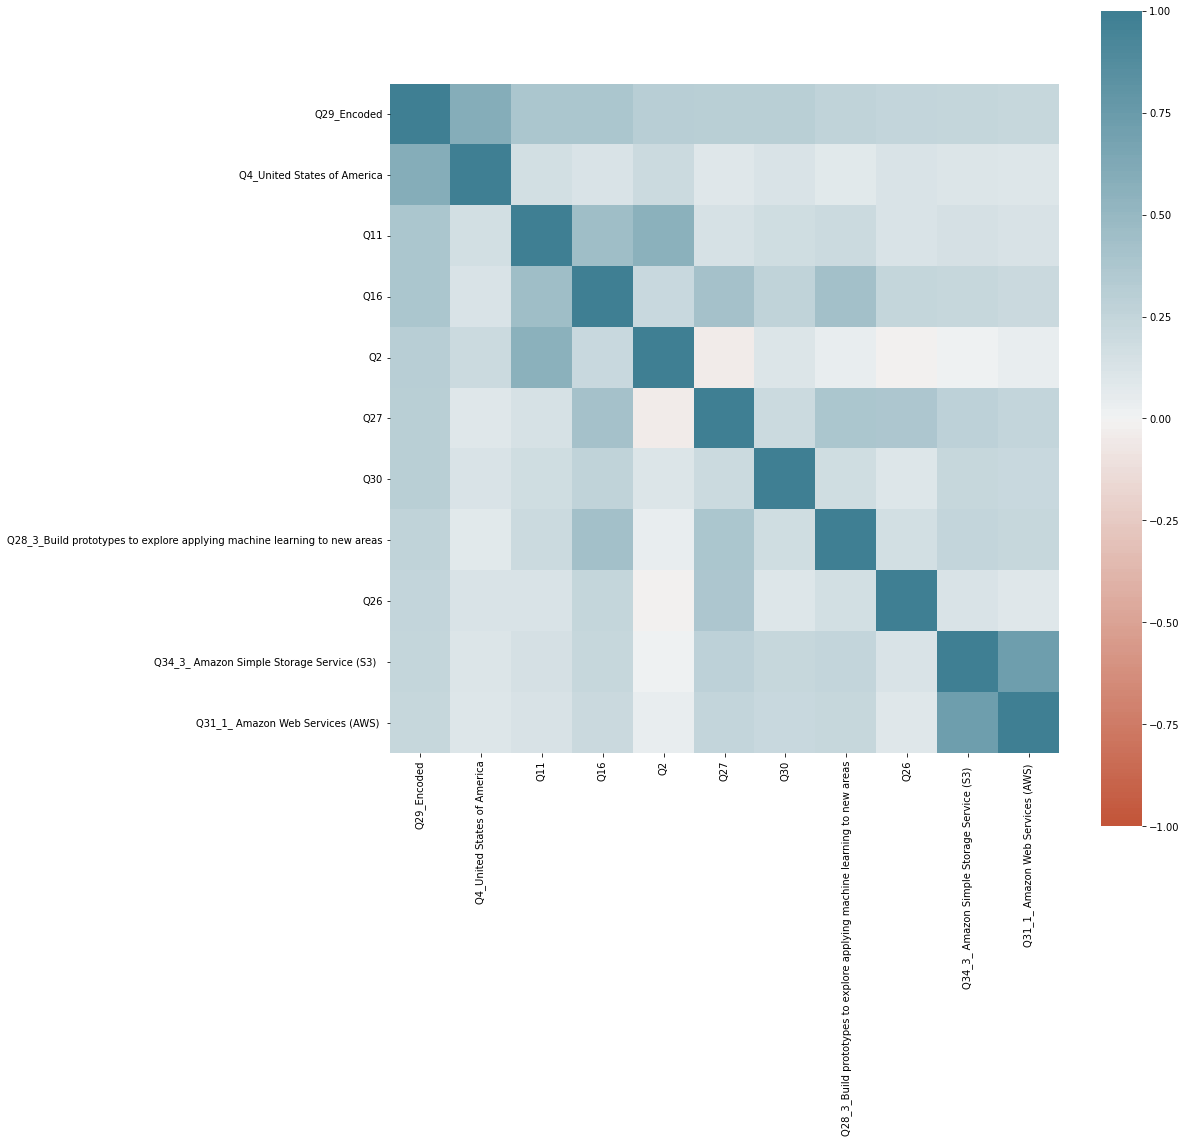

In [ ]:
# visualize the corr plot
fig, ax = plt.subplots(1,1,figsize=(15,15))

top10 = list(corr_Q29.nlargest(11).index)
corr = corr.loc[top10, top10]

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    ax = ax,
    square=True
)

Based on the graph above, we can see that the most correlated feature is whether the participant lives in the US.

The most related 5 questions are:
1. In which country do you currently reside? - United States of America  
2. For how many years have you been writing code and/or programming?
3. For how many years have you used machine learning methods?
4. What is your age (# years)?
5. Does your current employer incorporate machine learning methods into their business?


### 3.2 Feature selection

The features are selected from training data using Lasso regression. The idea of the regularized regression is to optimize the cost function and reduce the absolute values of the coefficients. It will automatically select the useful features and discard the useless or redundant features. Discarding a feature will make its coefficient equal to 0. In our case, we are selecting the features with coefficient larger than 0.1 for reducing the number of features selected. We also tune α hyperparameter in order to make Lasso regression work properly.

In [21]:
from sklearn.model_selection import train_test_split
# Separating the data into training and tests set (7:3)

X_train, X_test, y_train, y_test = train_test_split(
    df2.drop(labels=['Q29_Encoded'], axis=1),
    df2['Q29_Encoded'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5186, 326), (2223, 326), (5186,), (2223,))

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [23]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In this step, we optimize the α hyperparameter. The tested values are from 0.1 to 10 with 0.1 step. We apply GridSearchCV for this task.

In [24]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [25]:
search.fit(X_train,y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-7.533 total time=   0.3s
[CV 2/5] END .................model__alpha=0.1;, score=-8.606 total time=   0.3s
[CV 3/5] END .................model__alpha=0.1;, score=-8.118 total time=   0.3s
[CV 4/5] END .................model__alpha=0.1;, score=-8.855 total time=   0.3s
[CV 5/5] END .................model__alpha=0.1;, score=-8.752 total time=   0.4s
[CV 1/5] END .................model__alpha=0.2;, score=-7.735 total time=   0.3s
[CV 2/5] END .................model__alpha=0.2;, score=-8.915 total time=   0.3s
[CV 3/5] END .................model__alpha=0.2;, score=-8.494 total time=   0.3s
[CV 4/5] END .................model__alpha=0.2;, score=-9.267 total time=   0.3s
[CV 5/5] END .................model__alpha=0.2;, score=-9.009 total time=   0.3s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-7.949 total time=   0.3s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

We find the best value for α 0.1.

In [26]:
search.best_params_
# {'model__alpha': 0.1}

{'model__alpha': 0.1}

We get the values of the coefficients of Lasso regression. And calculate the importance of the features, which are the absolute values of the importance.

In [27]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [28]:
importance = np.abs(coefficients)

In [29]:
list_coeff = importance.tolist()

In [30]:
data = {'feature': X_train.columns, 'importance': list_coeff}

In [31]:
lasso_df = pd.DataFrame(data=data)

In [32]:
feature_selected = lasso_df.loc[lasso_df['importance'] > 0.1]

The selected features are displayed below. The features roughly match the results of the correlation. Which the participants currently live in the U.S. is the most important selected feature.

In [33]:
feature_selected.sort_values(by=['importance'], ascending=False)

,feature,importance
296,Q4_United States of America,1.917392
4,Q16,0.475760
292,Q4_India,0.461307
3,Q11,0.452736
8,Q30,0.402439
1,Q2,0.355494
305,"Q23_Manager (Program, Project, Operations, Exe...",0.316032
7,Q27,0.311769
311,Q24_Academics/Education,0.305348
6,Q26,0.298401


### 3.Model implementation

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

We define the function below to fit one logistic regression among the 14 regressions, which return the probability of the person from the Q29_encoded >= num. We scale the X training set and test set using MinMaxScaler separately, which subtracts the minimum value in the feature and then divides by the range. It helps to keep the data into range of 0 and 1 and preserve the shape of the original distribution. We didn't choose StandardScaler since it is useful for features follow a Normal distribution. 

In [34]:

def one_log_regression(X_train, y_train, X_test, y_test, num, solver, C):

  X_train_y = X_train.copy()

  X_train_y['Q29_Encoded'] = y_train

  df34 = X_train_y.copy()
  for i in range (0,X_train.shape[0]):
    if (X_train_y['Q29_Encoded'].iloc[i]>=num):
      df34['Q29_Encoded'].iloc[i]=1
        
    else:
      df34['Q29_Encoded'].iloc[i]=0


  X34=df34.drop(labels=['Q29_Encoded'], axis=1)
  y34=df34['Q29_Encoded']


  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(X34)
  X_test_scaled = scaler.fit_transform(X_test)

  model = LogisticRegression(solver=solver, C = C)
  model.fit(X_train_scaled, y34)

  # prob of array([0., 1.]).  predict x_test
  prob = model.predict_proba(X_test_scaled)
  
  return prob # shape(2223, 2)

We define the function below to merge the 14 probabilities derived from the 14 logistic regressions. The ordinal logistic model can compute the probability of every class and make classifications by choosing the class with the largest probability among the 14 classes. It return the predicted labels for each observations in the testing data.

In [35]:
def ordinal_logistic_regression(X_train, y_train, X_test, y_test, solver, C):

  prob_list = []

  for n in range(1,15): #num 1-14
    prob = one_log_regression(X_train, y_train, X_test, y_test, n, solver, C)
   
    prob_list.append(prob) # 15*[2223, 2]


    # merge 14 classes probability to 15*2223
  prob_14_list = []

  for i in range(0, X_test.shape[0]): #2223 test observations

      # prob(class0)
    prob0 = prob_list[0][i][0]
      # prob 1 = prob(y>=1) - prob(y>=2)
    prob1 = prob_list[0][i][1] - prob_list[1][i][1]
      # prob 2 = prob(y>=2) - prob(y>=3)
    prob2 = prob_list[1][i][1] - prob_list[2][i][1]

    prob3 = prob_list[2][i][1] - prob_list[3][i][1]

    prob4 = prob_list[3][i][1] - prob_list[4][i][1]

    prob5 = prob_list[4][i][1] - prob_list[5][i][1]

    prob6 = prob_list[5][i][1] - prob_list[6][i][1]

    prob7 = prob_list[6][i][1] - prob_list[7][i][1]

    prob8 = prob_list[7][i][1] - prob_list[8][i][1]

    prob9 = prob_list[8][i][1] - prob_list[9][i][1]

    prob10 = prob_list[9][i][1] - prob_list[10][i][1]

    prob11 = prob_list[10][i][1] - prob_list[11][i][1]

    prob12 = prob_list[11][i][1] - prob_list[12][i][1]

    prob13 = prob_list[12][i][1] - prob_list[13][i][1]

    prob14 = prob_list[13][i][1]

    prob_14_list.append([prob0, prob1, prob2, prob3,\
                      prob4, prob5, prob6,prob7,\
                      prob8, prob9, prob10,prob11,\
                      prob12, prob13, prob14])


      # merge 15*2223 prob list to 1*2223 predicted label
  prediction_list = []

  for i in range(0, X_test.shape[0]): #2223 test observations
    class_prob14 =  prob_14_list[i]

    max_value = max(class_prob14)
    index = class_prob14.index(max_value)
    prediction_list.append(index)


  return prediction_list

In [ ]:
from sklearn.metrics import classification_report

For question 3, we compute the accuracy of the model output by using the number of the correct predictions divided by the total number of the predictions. The predicted labels are compared with the actual y values to determine whether the model have corrent predictions.

In [45]:
def get_accuracy(y_test, prediction_list):


  acc = 0
  #from series to list
  y_test_list = y_test.iloc[:,0].tolist()

  for i in range(0, len(y_test_list)):
    if y_test_list[i] == prediction_list[i]:
      acc += 1


  return round(acc/len(y_test_list),3)

Below is the repetitative work as the same data split in the previous part for convenience.

In [103]:
X = df2.drop(['Q29_Encoded'],axis=1)
y = df2['Q29_Encoded']

X = X[feature_selected.feature]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

We define the function for splitting the data into 10 folds for cross validation. The model fits training data X_train and y_train, and make predictions based on X_test. The predicted labels are compared with y_test for computing accuracy. The hyperparameter are defined as solver and C, which can be used for tuning later.

In [55]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
import statistics as st

def cross_validation(X_train, X_test, y_train, y_test, solver, C):

  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X_train)

  accuracy = np.zeros(10)
  np_idx = 0
  acc_all = []

  for train_idx, test_idx in kfold.split(X_train):
      X_train_cv, X_test_cv = X_train.values[train_idx], X_train.values[test_idx]
      y_train_cv, y_test_cv = y_train.values[train_idx], y_train.values[test_idx]
    
      X_train_cv = pd.DataFrame(X_train_cv)
      X_test_cv = pd.DataFrame(X_test_cv)
      y_train_cv = pd.DataFrame(y_train_cv)
      y_test_cv = pd.DataFrame(y_test_cv)
      # print(X_train_cv.shape, type(X_train_cv), X_test_cv.shape, type(X_test_cv))
      prediction_list = ordinal_logistic_regression(X_train_cv, y_train_cv, X_test_cv, y_test_cv, solver = solver, C=C)
    
      accu = get_accuracy(y_test_cv, prediction_list)
      acc_all.append(accu)
      np_idx += 1
      print ("Fold {}: Accuracy: {}%".format(np_idx, round(accu,3)*100))

  print('solover =', solver, 'C=', C, 'average accuracy =', st.mean(acc_all), 'accuracy std =', st.stdev(acc_all),)


We tune the hyperparameter C for the selected values 1, 0.5, 0.1, 0.05, 0.01 and 0.001. The other hyperparameter solver is assigned to be 'newton-cg' in this case. Based on the results below, we have the accuracy between 30% to 40%. The model with solover = newton-cg and C= 0.05 has the highest average accuracy for the 10 folds, which is around 0.387. The corresponding standard deviation for the accuracy is around 0.026.

In [41]:
C=[1, 0.5, 0.1, 0.05, 0.01, 0.001]
for c in C:
  cross_validation(X_train, X_test, y_train, y_test, solver = 'newton-cg', C = c)

Fold 1: Accuracy: 35.3%
Fold 2: Accuracy: 39.1%
Fold 3: Accuracy: 39.5%
Fold 4: Accuracy: 38.3%
Fold 5: Accuracy: 42.0%
Fold 6: Accuracy: 36.0%
Fold 7: Accuracy: 35.3%
Fold 8: Accuracy: 41.3%
Fold 9: Accuracy: 37.3%
Fold 10: Accuracy: 40.300000000000004%
solover = newton-cg C= 1 average accuracy = 0.3844 accuracy std = 0.024235877904003767
Fold 1: Accuracy: 35.3%
Fold 2: Accuracy: 39.5%
Fold 3: Accuracy: 40.1%
Fold 4: Accuracy: 38.0%
Fold 5: Accuracy: 41.8%
Fold 6: Accuracy: 36.199999999999996%
Fold 7: Accuracy: 34.9%
Fold 8: Accuracy: 41.3%
Fold 9: Accuracy: 37.3%
Fold 10: Accuracy: 40.2%
solover = newton-cg C= 0.5 average accuracy = 0.3846 accuracy std = 0.024797849369115332
Fold 1: Accuracy: 35.6%
Fold 2: Accuracy: 40.1%
Fold 3: Accuracy: 40.1%
Fold 4: Accuracy: 38.3%
Fold 5: Accuracy: 41.4%
Fold 6: Accuracy: 35.5%
Fold 7: Accuracy: 35.099999999999994%
Fold 8: Accuracy: 41.3%
Fold 9: Accuracy: 38.0%
Fold 10: Accuracy: 40.0%
solover = newton-cg C= 0.1 average accuracy = 0.3854 accura

### Bias-variance trade-off

The bias-variance trade-off for the model is analyzed below. For the multiclass classification problem, the bias is defined as the deviation of the average estimate from the target value, which is the mean of the squared error between the average of the predictions and the true value (bias = np.mean((np.mean(prediction) - y_test)**2). The variance is the variance of the accuray in each fold. Then we compute the average bias and variance for the 10 folds to find the bias and variance of the model with the certain C values.

In [76]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
import statistics as st

def cross_validation_bias_var(X_train, X_test, y_train, y_test, solver, C):
  # return bias and var for these hyperparameters
  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X_train)

  np_idx = 0
  
  biaslist=[]
  varslist=[]

  for train_idx, test_idx in kfold.split(X_train):
      X_train_cv, X_test_cv = X_train.values[train_idx], X_train.values[test_idx]
      y_train_cv, y_test_cv = y_train.values[train_idx], y_train.values[test_idx]
    
      X_train_cv = pd.DataFrame(X_train_cv)
      X_test_cv = pd.DataFrame(X_test_cv)
      y_train_cv = pd.DataFrame(y_train_cv)
      y_test_cv = pd.DataFrame(y_test_cv)

      # print(X_train_cv.shape, type(X_train_cv), X_test_cv.shape, type(X_test_cv))
      prediction_list = ordinal_logistic_regression(X_train_cv, y_train_cv, X_test_cv, y_test_cv, solver = solver, C=C)
    

      #find bias and var for each fold
      bias, var = get_bias_var(y_test_cv, prediction_list)
      
      biaslist.append(bias)
      varslist.append(var)

      np_idx += 1

  return st.mean(biaslist), st.mean(varslist)

In [46]:
def get_bias_var(y_test_cv, prediction_list):
  
  y_test_list = y_test_cv.squeeze()

  bias = np.mean((np.mean(prediction_list) - y_test_list)**2)

  var = np.var(prediction_list)

  return bias, var

In [77]:
###Create bias and variance lists.
bias_hyper = []
var_hyper = []
C=[1, 0.5, 0.1, 0.05, 0.01, 0.001]

for c in C:
  bias, var = cross_validation_bias_var(X_train, X_test, y_train, y_test, solver = 'newton-cg', C = c)
  
  bias_hyper.append(bias)
  var_hyper.append(var)


The 6 biases and variances corresponding to the value C are displayed below. 

In [78]:
print(bias_hyper)
print(var_hyper)

[21.0523858162569, 21.149091783708837, 21.747833306194625, 22.42625111438751, 25.946448301874174, 35.491045297981714]
[21.411291391489392, 21.253680973722012, 20.469530570480675, 19.646600189646268, 14.7507816040375, 0.0]


Based on the graph below, we can see that as the model complexity increases, the variance of the model increases and the bias of the model decreases. When the model complexity is too much, the model may try to overfit the training data and have high variance. The Model with high variance captures lots of noice from training data and can not generalize on the testing data which it hasn’t seen before. In this way, as the complexity of the model increases, it may get lower accuarcy score for the test data.

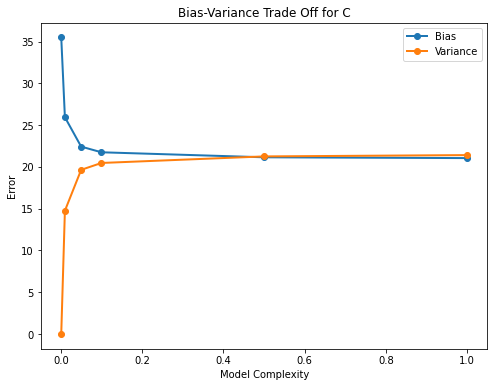

In [79]:

Bias = pd.DataFrame(bias_hyper,index=C)
Variance = pd.DataFrame(var_hyper,index=C)
plt.figure(figsize=(8,6))
plt.plot(Bias, label="Bias",linewidth = 2, marker='o')
plt.plot(Variance, label="Variance", linewidth = 2,marker='o')
plt.legend()
plt.title("Bias-Variance Trade Off for C")
plt.xlabel('Model Complexity')
plt.ylabel('Error')
plt.show()

### 4. Model tuning

In [37]:
from sklearn.metrics import make_scorer, confusion_matrix

In the net step, the hyperparameters C and solver are tuned by applying grid search based on the f1 scores.

In [39]:
def get_f1_score(y_test, prediction_list):

  #from series to list
  y_test_list = y_test.squeeze()

  TN = confusion_matrix(y_test_list, prediction_list)[0][0]
  FP = confusion_matrix(y_test_list, prediction_list)[0][1]
  FN = confusion_matrix(y_test_list, prediction_list)[1][0]
  TP = confusion_matrix(y_test_list, prediction_list)[1][1]

   
  if (TP == 0):
    Precision = 0
  else: 
    Precision = TP/(TP+FP)

  if (TP == 0):
    Recall = 0
  else: 
    Recall = TP/(TP+FN)


  if (Recall == 0) or (Precision == 0):

    f1 = 0
  else: 
    f1 = 2*Precision*Recall/(Precision + Recall)

  return f1

In [40]:
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
import statistics as st

def cross_validation_f1(X_train, X_test, y_train, y_test, solver, C):

  kfold = KFold(n_splits=10)
  kfold.get_n_splits(X_train)

  accuracy = np.zeros(10)
  np_idx = 0
  acc_all = []


  for train_idx, test_idx in kfold.split(X_train):
      X_train_cv, X_test_cv = X_train.values[train_idx], X_train.values[test_idx]
      y_train_cv, y_test_cv = y_train.values[train_idx], y_train.values[test_idx]
    
      X_train_cv = pd.DataFrame(X_train_cv)
      X_test_cv = pd.DataFrame(X_test_cv)
      y_train_cv = pd.DataFrame(y_train_cv)
      y_test_cv = pd.DataFrame(y_test_cv)
      # print(X_train_cv.shape, type(X_train_cv), X_test_cv.shape, type(X_test_cv))
      prediction_list = ordinal_logistic_regression(X_train_cv, y_train_cv, X_test_cv, y_test_cv, solver = solver, C=C)
    
      f1 = get_f1_score(y_test_cv, prediction_list)
      acc_all.append(f1)
      np_idx += 1
      print ("Fold {}: f1 score: {}".format(np_idx, f1))

  print('solover =', solver, 'C=', C, 'average f1 score =', st.mean(acc_all), 'accuracy std =', st.stdev(acc_all))
  return st.mean(acc_all), st.stdev(acc_all)

In [41]:

best_params = {}
best_accuracy = 0
best_std = 0

for C in [1, 0.1, 0.01, 0.001]:
  for solver in ['newton-cg','lbfgs','liblinear','sag']:
        avg_acc, std = cross_validation_f1(X_train, X_test, y_train, y_test, solver = solver, C = C)
        
        #print('solover =', solver, 'C=', C, 'average accuracy =', avg_acc, 'accuracy std =', std)


        if avg_acc > best_accuracy:
            best_params = {'C':C, 'solver':solver}
            best_accuracy = avg_acc
            best_std = std

print (best_params)
print ("Best Score: {}({})".format(best_accuracy,best_std,3))      

print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation f1 score of {} with a standard deviation of {}".format(best_params['C'],best_params['solver'],best_accuracy,best_std))

           

Fold 1: f1 score: 0
Fold 2: f1 score: 0
Fold 3: f1 score: 0
Fold 4: f1 score: 0.0909090909090909
Fold 5: f1 score: 0
Fold 6: f1 score: 0
Fold 7: f1 score: 0.046511627906976744
Fold 8: f1 score: 0.03636363636363636
Fold 9: f1 score: 0
Fold 10: f1 score: 0.08510638297872342
solover = newton-cg C= 1 average f1 score = 0.025889073815842743 accuracy std = 0.03695457178657299
Fold 1: f1 score: 0
Fold 2: f1 score: 0
Fold 3: f1 score: 0
Fold 4: f1 score: 0.0909090909090909
Fold 5: f1 score: 0
Fold 6: f1 score: 0
Fold 7: f1 score: 0.046511627906976744
Fold 8: f1 score: 0.03636363636363636
Fold 9: f1 score: 0
Fold 10: f1 score: 0.08510638297872342
solover = lbfgs C= 1 average f1 score = 0.025889073815842743 accuracy std = 0.03695457178657299
Fold 1: f1 score: 0
Fold 2: f1 score: 0
Fold 3: f1 score: 0
Fold 4: f1 score: 0.0909090909090909
Fold 5: f1 score: 0
Fold 6: f1 score: 0
Fold 7: f1 score: 0
Fold 8: f1 score: 0.03571428571428571
Fold 9: f1 score: 0
Fold 10: f1 score: 0.08510638297872342
solo

Apply computing the 16 combinations of the hyperparameters, we find the optimal model with C = 1 and solver = newton-cg.

### feature importance

We extract the 15 coefficients for all the 14 logistic regression models below, and compute means of coefficients the 14 models for the 15 features.

In [101]:

def one_log_regression_feature(X_train, y_train, X_test, y_test, num, solver, C):

  X_train_y = X_train.copy()

  X_train_y['Q29_Encoded'] = y_train

  df34 = X_train_y.copy()
  for i in range (0,X_train.shape[0]):
    if (X_train_y['Q29_Encoded'].iloc[i]>=num):
      df34['Q29_Encoded'].iloc[i]=1
        
    else:
      df34['Q29_Encoded'].iloc[i]=0


  X34=df34.drop(labels=['Q29_Encoded'], axis=1)
  y34=df34['Q29_Encoded']


  scaler = MinMaxScaler()
  X_train_scaled = scaler.fit_transform(X34)
  X_test_scaled = scaler.fit_transform(X_test)

  model = LogisticRegression(solver=solver, C = C)
  model.fit(X_train_scaled, y34)

  w = model.coef_[0]
  
  return w

In [114]:
def ordinal_logistic_regression_feature(X_train, y_train, X_test, y_test, solver, C):

  w_list = []

  for n in range(1,15): #num 1-14
    w = one_log_regression_feature(X_train, y_train, X_test, y_test, n, solver, C)
   
    w_list.append(w) # 15*[2223, 2]


  return w_list

In [115]:
w_list = ordinal_logistic_regression_feature(X_train, y_train, X_test, y_test, solver = 'newton-cg', C = 1)

In [125]:
def get_feature_weight(w_list, feature_num):

  weight = []

  for i in range(0, 14):
    weight.append(w_list[i][feature_num])

  return st.mean(weight)

In [126]:
weight_list = []
for n in range(0,15):
  weight_list.append(get_feature_weight(w_list, n))


In [142]:
weight_list_e = []
for w in weight_list:
  weight = pow(math.e,w)
  weight_list_e.append(weight)

In [143]:
import math
feature_importance = pd.DataFrame(feature_selected.feature, columns = ["feature"])

feature_importance["importance"] = weight_list_e
feature_importance = feature_importance.sort_values(by =['importance'], ascending = False)

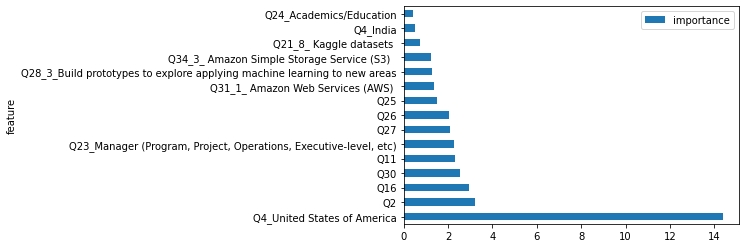

In [144]:
ax = feature_importance.plot.barh(x = 'feature', y = 'importance')
plt.show()

Based on the graph above, the question Q4_USA has the largest coefficient in the regression, meaning that it is the most important feature, followed by Q2, Q16 and Q30 respectively. The results are pretty similar for the correlation plots in the previous part, where Q4_USA, Q2, Q16 are the features that have larger correlation with the target variable y.

###  5.Testing & Discussion

We use the optimal model (C=1, solver = newton-cg) to make classifications on the test set. The model is fitted with the training data.

In [50]:
prediction_list = ordinal_logistic_regression(X_train, y_train, X_test, y_test, solver = 'newton-cg', C = 1)

In [55]:
y_test = pd.DataFrame(y_test)

accu = get_accuracy(y_test, prediction_list)

f1 = get_f1_score(y_test, prediction_list)

bias, var = get_bias_var(y_test, prediction_list)

print('Apply the optimal model for test data: test accuracy:', accu, 'test f1 score:', f1, 'bias:', bias, 'variance:', var)

Apply the optimal model for test data: test accuracy: 0.394 test f1 score: 0.03980099502487562 bias: 20.364903053162163 variance: 21.535831689677842


In [65]:
y_test = y_test.tolist()

In [78]:
pred_count = []
actual_count = []
for i in range(0,15):

  pred_count.append(prediction_list.count(i))
  actual_count.append(y_test.count(i))

In [79]:
print('pred_count', pred_count)
print('actual_count', actual_count)

pred_count [1581, 16, 30, 15, 47, 22, 7, 7, 3, 3, 215, 54, 173, 39, 11]
actual_count [808, 207, 156, 132, 130, 108, 84, 80, 71, 56, 117, 76, 92, 73, 33]


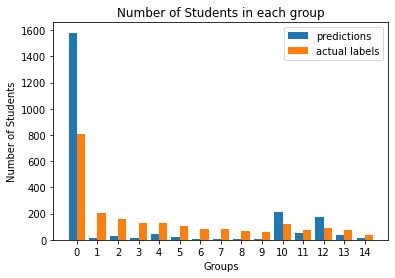

In [83]:
X = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
prd = pred_count
act = actual_count
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, prd, 0.4, label = 'predictions')
plt.bar(X_axis + 0.2, act, 0.4, label = 'actual labels')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

We want to compute training accuracy by prediting the X_train and compare the predictions with the actual X_test. Then we plot the distribution of true target variable values and the predictions.

In [84]:
prediction_list = ordinal_logistic_regression(X_train, y_train, X_train, y_train, solver = 'newton-cg', C = 1)

In [100]:
y_train = pd.DataFrame(y_train)

accu = get_accuracy(y_train, prediction_list)

f1 = get_f1_score(y_train, prediction_list)

bias, var = get_bias_var(y_train, prediction_list)

print('Apply the optimal model for train data: train accuracy:', accu, 'train f1 score:', f1, 'bias:', bias, 'variance:', var)

Apply the optimal model for train data: train accuracy: 0.393 train f1 score: 0.016563146997929604 bias: 21.049503773918005 variance: 21.51778892681638


In [96]:
y_train.squeeze()
y_train = y_train.tolist()

In [97]:
pred_count = []
actual_count = []
for i in range(0,15):

  pred_count.append(prediction_list.count(i))
  actual_count.append(y_train.count(i))

In [98]:
print('pred_count', pred_count)
print('actual_count', actual_count)

pred_count [3624, 35, 72, 54, 119, 58, 23, 22, 6, 15, 524, 112, 423, 80, 19]
actual_count [1807, 519, 408, 301, 270, 228, 220, 194, 141, 137, 273, 183, 242, 156, 107]


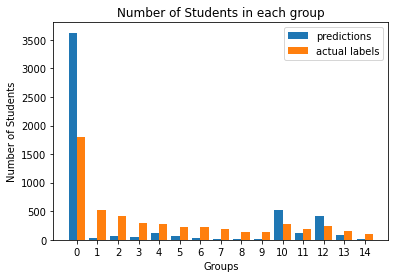

In [99]:
X = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14']
prd = pred_count
act = actual_count
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, prd, 0.4, label = 'predictions')
plt.bar(X_axis + 0.2, act, 0.4, label = 'actual labels')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

Based on the analysis above, the test accuracy is slightly above the training accuracy, which is around 0.394 (compared to 0.393 of the training). The test f1 score is also slightly above the training score (0.0398 vs 0.0166). The bias and variance are around 20 and 22 for the test data respectively. For training data, the model has the scores of 21 and 22. The accuracy of the model is similar for training and test data, indicating that the performance of the model is not bad. When predicting the test labels, the variance and bias does not change too much compared to the predictions for the training labels, meaning that the model does not overfit or underfit. However, the model still have a low performance since the accuracy is below 50 percent and it can not even predict half of the samples right. The higher test accuracy might be because that the test data is similar to the training ones and have some easier points. We may try n-fold cross validation and try more n for this problem. The low accuracy of the model also indicates that the model is not complex enough for this problem. We may try other complex machine learning algorithm such as neuron network, random forest, etc,

In [140]:
%%shell
jupyter nbconvert --to html /content/FFFFinalMIE1624_assignment_2.ipynb

[NbConvertApp] Converting notebook /content/FFFFinalMIE1624_assignment_2.ipynb to html
[NbConvertApp] Writing 675121 bytes to /content/FFFFinalMIE1624_assignment_2.html
